# Data Exploration and Wrangling Assignment

The objective of this assignment is to evaluate your understanding of Data Exploration and Data Wrangling concepts, along with your ability to apply them practically using standard Python libraries.

In [1]:
# imports
import math
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Assignment

You are provided with a dataset containing 1000 records of personal information. The dataset has various inconsistencies, missing values, and data quality issues.

### Your Task
1. Analyze the Dataset

Identify and summarize the inconsistencies or issues present in each column.
Provide insights into the distribution of key attributes (e.g., Age, Gender, Income).

2. Clean and Fix the Dataset

Handle missing values appropriately.
Fix inconsistencies in formatting (e.g., non-standard number formats, malformed email addresses).
Ensure all columns adhere to valid data types and formats.

3. Generate Insights

After cleaning, create a summary of trends and patterns in the data.
Highlight any relationships or correlations between variables such as Age, Weekly Wage, and Job Status.

### Dataset Overview:
The dataset includes the following columns:

- ID: Unique 7-character alphanumeric identifiers. May contain duplicates
- Name: Full names with random capitalization and missing middle names.
- Date of Birth: Two date formats with some missing values.
- Age: Derived from DOB but has missing or inconsistent entries.
- Gender: M/F/O
- Body Mass Index (BMI): Includes some missing data.
- Address: Concatenated address strings.
- Weekly Wage: Ranges from 100 to 10,000, including dirty formats like "5K".
- Job Status: Student, Employed, or Unemployed.
- Profession: Relevant for employed individuals, with some inconsistencies.
- Annual Income: Ranges from 5,000 to 500,000, with dirty formats and missing values.
- Email Address: Valid and malformed emails.
- Contact Number: 11-digit numbers with some non-standard formats.
- Marital Status: Married/Unmarried.
- \# of Dependants: Numeric values with occasional non-standard text entries.
- Avg Monthly Expenditure: Ranges from 50 to 500,000, including dirty formats.

## Reading dataset

You are given a CSV file. The file is located in the `data` directory under the name `data.csv`.

You are required to read it into a pandas DataFrame using the pandas library.

In [2]:
# Listing files in the assignment for reference
import os

for dirname, dirnames, filenames in os.walk("."):
    # Remove hidden directories from the list of directories to walk
    dirnames[:] = [d for d in dirnames if not d.startswith('.')]
    
    for filename in filenames:
        # Check if the file has the desired extensions
        if filename.endswith(".csv") or filename.endswith(".ipynb"):
            print(os.path.join(dirname, filename))

./Assignment1.ipynb
./data/data.csv


In [3]:
filename = None
### BEGIN SOLUTION
filename = "./data/data.csv"
### END SOLUTION

df = None

### BEGIN SOLUTION
df = pd.read_csv(filename)
### END SOLUTION

df.head()

,ID,Name,Date of Birth,Age,Gender,Address,Weekly wage,Job status,Profession,Annual Income,Email address,Contact Number,Marital Status,# of dependants,Body Mass Index,Avg Monthly Expenditure
0,XAJI0Y6,allison hill,"November 23, 1959",65.0,M,"18196 Anthony Forge, New Carolyn, Oklahoma, 26563",2058,Unemployed,NaN,114402.70877741661,lrobinsonpacheco-smith.com,9407816184959,Unmarried,2,23.620363,4852
1,0T9NT3W,BENJAMIN STANLEY,"October 14, 1976",NaN,M,"31647 Martin Knoll Apt. 419, New Jessica, Hawa...",1580,Employed,Designer,86036.38827774212,onelson@example.net,5030564139537,Unmarried,5,26.691233,7585
2,9XUY41I,thomas ellis,10/13/1987,37.0,O,"38849 Hurst Locks Suite 328, Daviston, Delawar...",1113,Unemployed,NaN,61374.016080162015,laurahenderson@example.org,6978480184514,Unmarried,4,26.541319,2834
3,XAJI0Y6,jesse mckay,"September 26, 2002",22.0,O,"281 Skinner Parkways Apt. 252, New Mariotown, ...",834,Employed,Teacher,45872.70659362884,john39@example.org,7182278248963,Married,4,24.212266,9090
4,2TALA75,nicole vaughn,04/17/1978,46.0,M,"5787 John Circles Suite 098, New Jeffrey, Cali...",1658,Employed,Teacher,88967.86686411515,perezrebecca@example.com,8347382997376,Unmarried,1,26.426086,3843


In [4]:
assert len(df) == 1000
assert set(df.columns) == {'ID', 'Name', 'Date of Birth', 'Age', 'Gender', 'Body Mass Index',
       'Address', 'Weekly wage', 'Job status', 'Profession', 'Annual Income',
       'Email address', 'Contact Number', 'Marital Status', '# of dependants',
       'Avg Monthly Expenditure'}
### BEGIN HIDDEN TESTS
# checking for particular samples at fixed indexes
assert df.iloc[0].Name == "allison hill" 
assert df.iloc[448].Address == "236 Lopez Shores, South Tracy, Louisiana, 57838"

# assert types of columns
assert df['ID'].dtype == object
assert df['Name'].dtype == object
assert df['Date of Birth'].dtype == object
assert df['Age'].dtype == np.float64
assert df['Gender'].dtype == object
assert df['Body Mass Index'].dtype == np.float64
assert df['Address'].dtype == object
assert df['Weekly wage'].dtype == object
assert df['Job status'].dtype == object
assert df['Profession'].dtype == object
assert df['Annual Income'].dtype == object
assert df['Email address'].dtype == object
assert df['Contact Number'].dtype == object
assert df['Marital Status'].dtype == object
assert df['# of dependants'].dtype == object
assert df['Avg Monthly Expenditure'].dtype == object

### END HIDDEN TESTS

In [5]:
df.iloc[448].Address

'236 Lopez Shores, South Tracy, Louisiana, 57838'

## Data Types of Columns
Let us check out the data types of the columns.

In [6]:
df.dtypes

ID                          object
Name                        object
Date of Birth               object
Age                        float64
Gender                      object
Address                     object
Weekly wage                 object
Job status                  object
Profession                  object
Annual Income               object
Email address               object
Contact Number              object
Marital Status              object
# of dependants             object
Body Mass Index            float64
Avg Monthly Expenditure     object
dtype: object

### Observation

We see that most of the columns are read as `object` while Age and Body Mass Index have been read as 'float64'.

This indicates that pandas was unable to automatically assign appropriate data types to our columns.

This usually occurs when our data is dirty. Let us explore the different columns to find and fix the problematic records.

# Data Exploration

In this section, we will look at some of the columns and try to find columns with dirty data and clean them using some set rules.



## De Duplication

Let us start with the most basic task. We want to remove any duplicate records in dataset.

Since each record has a unique identifier, we shall use it.


In [7]:
column_name_for_deduplication = None
### BEGIN SOLUTION
column_name_for_deduplication = "ID"
### END SOLUTION

In [8]:
assert type(column_name_for_deduplication) == str
### BEGIN HIDDEN TESTS
assert column_name_for_deduplication == "ID"
### END HIDDEN TESTS

**TASK**: We want to keep the last (latest) record in the set of duplicates and drop all the other duplicate records.

In [9]:
# Hint: Check out the drop_duplicates API here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
de_duplicated_df = df.drop_duplicates()

### BEGIN SOLUTION
de_duplicated_df = df.drop_duplicates(column_name_for_deduplication, keep='last')
### END SOLUTION

In [10]:
assert type(de_duplicated_df) == pd.DataFrame
assert len(de_duplicated_df) == 935
### BEGIN HIDDEN TESTS

def assert_duplicate_id(duplicate_id):
    assert df['ID'].value_counts()[duplicate_id] != 1
    assert de_duplicated_df['ID'].value_counts()[duplicate_id] == 1

duplicate_ids = ["N6QICAT","0EZZF8S","NTCAGRP","9C0TK1Q","XAJI0Y6", "TWZ1UU7"]
_ = [assert_duplicate_id(id) for id in duplicate_ids]

sample_id = "0EZZF8S"
remaining_rows = de_duplicated_df[de_duplicated_df.ID==sample_id]
assert len(remaining_rows) == 1
remaining_row = remaining_rows.iloc[0]
assert remaining_row.Name == "COREY SANDOVAL"
assert math.isnan(remaining_row['Body Mass Index'])


sample_id = "TWZ1UU7"
remaining_rows = de_duplicated_df[de_duplicated_df.ID==sample_id]
assert len(remaining_rows) == 1
remaining_row = remaining_rows.iloc[0]
assert remaining_row.Name == "LINDA CLARK"
    
### END HIDDEN TESTS

**Bonus (Extra Credit)**: If the last record has empty / missing values, we want to fill them using the subsequent records going from bottom to up.

In [11]:
# Hint: Check out the drop_duplicates API here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
de_duplicated_extra_credit_df = None

### BEGIN SOLUTION
grouped = df.groupby("ID", sort=False)

# Step 2: Fill missing values in the last record
def fill_last_row(group):    
    last_row = group.iloc[-1]
    for col in group.columns:
        if pd.isna(last_row[col]):
            # Fill missing values in the last row with preceding non-null values
            last_row[col] = group[col].dropna().iloc[-1] if group[col].dropna().size > 0 else None
    return last_row

# Apply the function to fill missing values
filled_data = grouped[df.columns.tolist()].apply(fill_last_row)

# Drop duplicates, keeping only the last occurrence
de_duplicated_extra_credit_df = filled_data.drop_duplicates(subset="ID", keep="last")
### END SOLUTION

In [12]:
# Extra Credit Test Cases
assert len(de_duplicated_extra_credit_df) == 935
### BEGIN HIDDEN TESTS

sample_id = "0EZZF8S"
remaining_rows = de_duplicated_extra_credit_df[de_duplicated_extra_credit_df.ID==sample_id]
assert len(remaining_rows) == 1
remaining_row = remaining_rows.iloc[0]
assert remaining_row.Name == "COREY SANDOVAL"
assert np.isclose(remaining_row['Body Mass Index'], 26.471274)


sample_id = "TWZ1UU7"
remaining_rows = de_duplicated_extra_credit_df[de_duplicated_extra_credit_df.ID==sample_id]
assert len(remaining_rows) == 1
remaining_row = remaining_rows.iloc[0]
assert remaining_row.Name == "LINDA CLARK"
    
### END HIDDEN TESTS

In [13]:
# For our analysis below, we will use de_duplicated_df
cleaned_df = de_duplicated_df

## Imputing Data from Related Fields

Missing values can often be addressed using data imputation techniques by leveraging information from related fields. In our dataset, this applies to the Date of Birth and Age columns.

Since we assume the data is up-to-date, if the Age is missing, it can be calculated using the available Date of Birth. This ensures consistency and completeness in the dataset.

However, if the Date of Birth is missing, those records will need to be removed from the dataset.

In [14]:
missing_dob_dropped_df = None

### BEGIN SOLUTION
missing_dob_dropped_df = cleaned_df.dropna(subset=["Date of Birth"]).reset_index(drop=True)
### END SOLUTION

In [15]:
assert type(missing_dob_dropped_df) == pd.DataFrame
assert len(missing_dob_dropped_df) == 934

### BEGIN HIDDEN TESTS
assert cleaned_df["Date of Birth"].isna().any()
assert not missing_dob_dropped_df["Date of Birth"].isna().any()
### END HIDDEN TESTS

### Cleaning noisy data
Let us look at some values of the Date of Birth column and checkout what format is being used. Remember, pandas had auto-classified it as object.

In [16]:
missing_dob_dropped_df["Date of Birth"].head(20)

0            10/13/1987
1            04/17/1978
2     December 21, 1983
3            11/26/1973
4            06/10/1958
5            02/03/1985
6      October 16, 1973
7         July 20, 1984
8      October 14, 1973
9        April 19, 2006
10           03/11/1977
11     October 01, 1983
12           11/14/1990
13           04/02/1958
14        June 10, 1994
15    December 11, 1974
16           06/01/1983
17       April 02, 1972
18     January 07, 1981
19    November 23, 1949
Name: Date of Birth, dtype: object

In [17]:
# Convert to datetime format, handling two different formats. Use pd.to_datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

### BEGIN SOLUTION

# Format 1: mm/dd/yyyy
missing_dob_dropped_df["Date of Birth"] = pd.to_datetime(missing_dob_dropped_df["Date of Birth"], format='%m/%d/%Y', errors='coerce')

# Format 2: Month d, yyyy
missing_dob_dropped_df["Date of Birth"] = missing_dob_dropped_df["Date of Birth"].fillna(pd.to_datetime(df["Date of Birth"], format='%B %d, %Y', errors='coerce'))

### END SOLUTION

missing_dob_dropped_df = missing_dob_dropped_df.dropna(subset=["Date of Birth"]).reset_index(drop=True)



In [18]:
assert type(missing_dob_dropped_df) == pd.DataFrame
assert len(missing_dob_dropped_df) == 796

### BEGIN HIDDEN TESTS
assert not missing_dob_dropped_df["Date of Birth"].isna().any()
assert missing_dob_dropped_df['Date of Birth'].dtype == "datetime64[ns]"
### END HIDDEN TESTS

### Fill missing age values from dob

In [19]:
age_imputed_df = None

### BEGIN SOLUTION
current_date = pd.Timestamp.now()

age_imputed_df = missing_dob_dropped_df.copy()


age_imputed_df.loc[age_imputed_df["Age"].isna() & age_imputed_df["Date of Birth"].notna(), "Age"] = age_imputed_df.apply(
    lambda row: (current_date - row["Date of Birth"]).days // 365 if pd.notna(row["Date of Birth"]) else None,
    axis=1
)
### END SOLUTION

In [20]:
assert isinstance(age_imputed_df, pd.DataFrame)
assert len(age_imputed_df) == 796

### BEGIN HIDDEN TESTS
assert cleaned_df["Age"].isna().any()
assert not age_imputed_df["Age"].isna().any()
### END HIDDEN TESTS

In [21]:
# Convert datatype of age to integer
age_imputed_df["Age"] = pd.to_numeric(age_imputed_df["Age"], downcast='integer')

In [22]:
# For our analysis below, we will use de_duplicated_df
cleaned_df = age_imputed_df

### Cleaning up numerical columns

We know that columns like Weekly wage, Annual Income, Avg Monthly Expenditure, # of dependants

In [23]:
cleaned_df['Weekly wage'].head(10)

0     1113
1     1658
2     2220
3     3040
4      891
5     2025
6       1K
7     1982
8     1643
9    1,213
Name: Weekly wage, dtype: object

In [24]:
cleaned_df['Annual Income'].head(10)

0    61374.016080162015
1     88967.86686411515
2    115644.90259832227
3    163359.15599413545
4     47740.30545276119
5    115120.71883161507
6     81692.18488658861
7    108682.79343335582
8     89733.94399770998
9     68282.36174984252
Name: Annual Income, dtype: object

In [25]:
cleaned_df['# of dependants'].head(10)

0    4
1    1
2    0
3    2
4    5
5    5
6    3
7    1
8    2
9    6
Name: # of dependants, dtype: object

In [26]:
cleaned_df['Avg Monthly Expenditure'].head(10)

0     2834
1     3843
2     9904
3     5226
4      919
5     4052
6     5973
7    5,130
8     5777
9     4645
Name: Avg Monthly Expenditure, dtype: object

In [27]:
cleaned_df['# of dependants'].value_counts()

# of dependants
5       122
0       118
2       116
1       116
3       113
4       105
6       105
Five      1
Name: count, dtype: int64

We notice that there is some dirty data. The format of the numeric values is not correct.

We will try to write some clean up logic which will help preserve the data


In [28]:
numeric_columns = ['Weekly wage', 'Annual Income', '# of dependants', 'Avg Monthly Expenditure']

cleaned_df_with_numeric_values = cleaned_df.copy()

for column in numeric_columns:
    cleaned_values = []
    for record in cleaned_df[column]:
        try:
            # Remove commas
            ### BEGIN SOLUTION
            record = record.replace(",", "")
            ### END SOLUTION

            # Handle 'K' notation
            if "k" in record.lower():
                ### BEGIN SOLUTION
                record = record.replace("k", "").replace("K", "")
                record = float(record) * 1000
                ### END SOLUTION

            # Convert to integer if possible
            record = float(record)
        except ValueError as e:
            record = None
        cleaned_values.append(record)
    
    # Update the DataFrame column
    cleaned_df_with_numeric_values.loc[:, column] = cleaned_values

In [29]:
for col in numeric_columns: 
    cleaned_df_with_numeric_values[col] = pd.to_numeric(cleaned_df_with_numeric_values[col])
    cleaned_df_with_numeric_values = cleaned_df_with_numeric_values.dropna(subset=[col]).reset_index(drop=True)

In [30]:
assert isinstance(cleaned_df_with_numeric_values, pd.DataFrame)

### BEGIN HIDDEN TESTS
assert len(cleaned_df_with_numeric_values) == 795
for col in numeric_columns:
    assert cleaned_df_with_numeric_values[col].dtype == float

### END HIDDEN TESTS

In [31]:
cleaned_df = cleaned_df_with_numeric_values

## Cleaning Miscellaneous Columns

Let us clean columns like Contact Number which have non standard formats

In [32]:
cleaned_df['Contact Number'].head(20)

0        6978480184514
1        8347382997376
2     +1(989)-233-5291
3        9816934060883
4        4436995777387
5        8734714345581
6        1708053100330
7        3193149190586
8        6349578856855
9        8677496499091
10       4902787429671
11       3782639821465
12       5766270289517
13       0748217594647
14       1604817549651
15       6177115921249
16       9402445502296
17       1476797643815
18       4329212779979
19       7935978207151
Name: Contact Number, dtype: object

In [33]:
cleaned_values = []
cleaned_df_with_phone_numbers = cleaned_df.copy()
for record in cleaned_df['Contact Number']:
    
        # Remove +
        ### BEGIN SOLUTION
        record = record.replace("+", "")
        ### END SOLUTION

        # Remove -
        ### BEGIN SOLUTION
        record = record.replace("-", "")
        ### END SOLUTION

        # Remove (
        ### BEGIN SOLUTION
        record = record.replace("(", "")
        ### END SOLUTION

        # Remove )
        ### BEGIN SOLUTION
        record = record.replace(")", "")
        ### END SOLUTION

        if len(record) == 12:
            # add 1 at the start
            ### BEGIN SOLUTION
            record = "1" + record
            ### END SOLUTION

        if len(record) == 13:
            # Convert to integer if possible
            try:    
                record = int(record)
            except ValueError as e:
                print(e)
                record = None
        else:
            record = None

        cleaned_values.append(record)
cleaned_df_with_phone_numbers.loc[:, 'Contact Number'] = cleaned_values
cleaned_df_with_phone_numbers['Contact Number'] = pd.to_numeric(cleaned_df_with_phone_numbers['Contact Number'])
cleaned_df_with_phone_numbers = cleaned_df_with_phone_numbers.dropna(subset=["Contact Number"]).reset_index(drop=True)

In [34]:
assert isinstance(cleaned_df_with_phone_numbers, pd.DataFrame)
assert len(cleaned_df_with_phone_numbers) == 771

### BEGIN HIDDEN TESTS
assert cleaned_df_with_phone_numbers['Contact Number'].dtype == float
### END HIDDEN TESTS

Let us clean up the email column

In [35]:
cleaned_df_with_phone_numbers['Email address'].head(15)

0      laurahenderson@example.org
1        perezrebecca@example.com
2               yreed@example.com
3     christinaturner@example.net
4               wcole@example.org
5          kathleen64@example.com
6      hickmanbarbara@example.com
7            fmcguire@example.com
8          davidduran@example.net
9         suzannehuff@example.net
10          william46@example.com
11         ashleyhall@example.com
12        jesselittle@example.com
13            zcoffey@example.net
14          stephen00@example.com
Name: Email address, dtype: object

In [36]:
cleaned_df_with_emails = cleaned_df_with_phone_numbers.copy()
def clean_email(email):

    # Handle missing values
    ### BEGIN SOLUTION
    if pd.isna(email):  
        return None
    ### END SOLUTION

    # Remove leading/trailing spaces
    ### BEGIN SOLUTION
    email = email.strip()
    ### END SOLUTION

    # Remove invalid emails like "testemail", "jon@", "sample@gmail"
    ### BEGIN SOLUTION
    if "@" not in email or email.endswith("@") or "." not in email.split("@")[-1]:
        return None
    ### END SOLUTION
    return email

# Apply the cleanup function to the email column
cleaned_df_with_emails["Email address"] = cleaned_df_with_emails["Email address"].apply(clean_email)
cleaned_df_with_emails = cleaned_df_with_emails.dropna(subset=["Email address"]).reset_index(drop=True)

In [37]:
assert isinstance(cleaned_df_with_emails, pd.DataFrame)
assert len(cleaned_df_with_emails) == 762

### BEGIN HIDDEN TESTS
assert cleaned_df_with_phone_numbers['Email address'].dtype == object
### END HIDDEN TESTS

In [38]:
final_clean_df = cleaned_df_with_phone_numbers

In [39]:
final_clean_df.head(10)

,ID,Name,Date of Birth,Age,Gender,Address,Weekly wage,Job status,Profession,Annual Income,Email address,Contact Number,Marital Status,# of dependants,Body Mass Index,Avg Monthly Expenditure
0,9XUY41I,thomas ellis,1987-10-13,37,O,"38849 Hurst Locks Suite 328, Daviston, Delawar...",1113.0,Unemployed,NaN,61374.016080,laurahenderson@example.org,6.978480e+12,Unmarried,4.0,26.541319,2834.0
1,2TALA75,nicole vaughn,1978-04-17,46,M,"5787 John Circles Suite 098, New Jeffrey, Cali...",1658.0,Employed,Teacher,88967.866864,perezrebecca@example.com,8.347383e+12,Unmarried,1.0,26.426086,3843.0
2,78BMYYM,COREY MURPHY,1958-06-10,66,M,"5868 Crosby Crescent, Gregoryview, Arizona, 14709",3040.0,Employed,Engineer,163359.155994,yreed@example.com,9.816934e+12,Married,2.0,24.747037,5226.0
3,35IXOKC,BENJAMIN BECK,1985-02-03,39,F,"514 Estrada Islands Suite 482, South Elizabeth...",891.0,Employed,Doctor,47740.305453,christinaturner@example.net,4.436996e+12,Unmarried,5.0,26.773047,919.0
4,S280XKX,SYLVIA MARTINEZ,1987-03-03,51,M,"8895 Salazar Stravenue, Rivasside, New Hampshi...",2025.0,Employed,Designer,115120.718832,wcole@example.org,8.734714e+12,Married,5.0,23.729799,4052.0
5,EIYZCOT,rebecca ramsey,1983-12-21,40,O,"98069 Christopher Meadow Apt. 720, Nicholasbor...",1000.0,Employed,Doctor,81692.184887,kathleen64@example.com,1.708053e+12,Married,3.0,20.441476,5973.0
6,QEWAOUA,cynthia wells,2008-08-01,51,M,"374 Jackson Rest, Port Loriport, Connecticut, ...",1982.0,Employed,Designer,108682.793433,hickmanbarbara@example.com,3.193149e+12,Unmarried,1.0,26.725006,5130.0
7,UBTXCXA,catherine lewis,1977-03-11,47,F,"4948 Zachary Field Apt. 367, Lake Thomas, Virg...",1643.0,Unemployed,NaN,89733.943998,fmcguire@example.com,6.349579e+12,Unmarried,2.0,20.625447,5777.0
8,L08YG0J,LAURA HARRISON,1990-11-14,34,F,"2047 Lynn Locks Suite 190, East Lisa, Maryland...",1213.0,Employed,Engineer,68282.361750,davidduran@example.net,8.677496e+12,Married,6.0,22.627077,4645.0
9,YQBKK4C,LINDA HOLLOWAY,1958-04-02,66,M,"1746 Mason Park Suite 190, Navarroview, Alaska...",2164.0,Employed,Teacher,112657.056718,suzannehuff@example.net,4.902787e+12,Unmarried,3.0,26.755460,3000.0


### Null Columns

Let us check is any are left with null values

In [40]:
# Check columns with null values
null_columns = final_clean_df.isnull().sum()

# Filter to display only columns with null values
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Profession         283
Body Mass Index     28
dtype: int64


## Inferring Data

We notice that in some places the BMI is still missing. Since we do not have a way to calculate it, we will use Mean imputation.

To address missing BMI values in the dataset, we will follow these steps:

1. **Identify Potential Factors**: Evaluate attributes such as gender, annual income, age, job status, marital status, and the number of dependents, which are hypothesized to have a relationship with BMI.

2. **Analyze Relationships**: Compute pairwise correlations between BMI and these attributes to identify the strength and direction of their relationships.

3. **Select Key Attributes**: Based on the correlation analysis, choose the top 5 attributes with the highest absolute correlation values (both positive and negative) for further analysis.

4. **Impute Missing Values**: For each missing BMI value, calculate the mean BMI within subgroups sharing similar values of the selected attributes. Replace the missing BMI value with the computed mean for the corresponding subgroup.


In [41]:
columns_of_interest = ['Gender', 'Annual Income', 'Age', 'Job status', 'Marital Status', '# of dependants', 'Body Mass Index']

# since some columns are categorical, we need to encode them
categorical_columns = ['Gender', 'Job status', 'Marital Status']

# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(final_clean_df, columns=categorical_columns, drop_first=False)

updated_columns_of_interest = [
    col for col in data_encoded.columns
    if col in ['Annual Income', 'Age', '# of dependants', 'Body Mass Index'] or
    any(col.startswith(cat_col) for cat_col in categorical_columns)
]

# Compute correlation matrix : Refer - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
correlation_matrix = None
### BEGIN SOLUTION
correlation_matrix = data_encoded[updated_columns_of_interest].corr()
### END SOLUTION

# Extract BMI correlations
bmi_correlation = None

### BEGIN SOLUTION
bmi_correlation = correlation_matrix['Body Mass Index'].sort_values(ascending=False)
### END SOLUTION
display(bmi_correlation)

Body Mass Index             1.000000
Gender_M                    0.347182
Job status_Unemployed       0.251970
Age                         0.212166
Annual Income               0.190603
Marital Status_Married      0.161754
# of dependants             0.152400
Gender_O                   -0.020829
Job status_Student         -0.052331
Marital Status_Unmarried   -0.161754
Job status_Employed        -0.182015
Gender_F                   -0.327399
Name: Body Mass Index, dtype: float64

In [42]:
assert isinstance(bmi_correlation, pd.Series)
assert np.isclose(bmi_correlation["Gender_M"], 0.347182, rtol=1e-3)

### BEGIN HIDDEN TESTS
assert np.isclose(bmi_correlation["Job status_Unemployed"], 0.251970, rtol=1e-3)
assert np.isclose(bmi_correlation["Age"], 0.212166, rtol=1e-3)
assert np.isclose(bmi_correlation["Annual Income"], 0.190603, rtol=1e-3)
assert np.isclose(bmi_correlation["Marital Status_Married"], 0.161754, rtol=1e-3)
assert np.isclose(bmi_correlation["# of dependants"], 0.152400, rtol=1e-3)
assert np.isclose(bmi_correlation["Gender_O"], -0.020829, rtol=1e-3)
assert np.isclose(bmi_correlation["Job status_Student"], -0.052331, rtol=1e-3)
assert np.isclose(bmi_correlation["Marital Status_Unmarried"], -0.161754, rtol=1e-3)
assert np.isclose(bmi_correlation["Job status_Employed"], -0.182015, rtol=1e-3)
assert np.isclose(bmi_correlation["Gender_F"], -0.327399, rtol=1e-3)
### END HIDDEN TESTS

Now, we need to select the top 5 parameters which affect the BMI from the above results.

In [43]:
# Exclude self-correlation and select top 3 based on absolute correlation values in order

top_correlated_columns = None
### BEGIN SOLUTION
top_correlated_columns = bmi_correlation.drop('Body Mass Index').abs().sort_values(ascending=False).head(5).index.tolist()
### END SOLUTION

In [44]:
assert len(top_correlated_columns) == 5
### BEGIN HIDDEN TESTS
assert top_correlated_columns == ['Gender_M', 'Gender_F', 'Job status_Unemployed', 'Age', 'Annual Income']
### END HIDDEN TESTS

For each missing BMI value, we calculate the mean BMI based on the group of records that share the same selected columns.

Note: If there are numeric columns, such as Annual Income, they need to be either converted into a range/group or a similarity-based selection technique should be applied.

### Clustering
We will use KMeans clustering based on the selected columns. The cluster representative will be the mean of the features, and this mean will be used to fill the missing BMI values.



In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### K-means
#### Scaling
Since KMeans results are affected by the magnitude of the input values, it is important to scale, normalize, or standardize the input features to achieve better clustering results. If you think your selected columns do not need scaling, simply clear the raised Exception below

For K means algorithm, we will use sklearn library. Refer: https://scikit-learn.org/1.5/modules/generated/sklearn.cluster.KMeans.html

In [46]:
scaler = MinMaxScaler()
### BEGIN SOLUTION
data_encoded['Normalized Age'] = scaler.fit_transform(final_clean_df[['Age']])

scaler2 = MinMaxScaler()
data_encoded['Normalized Annual Income'] = scaler2.fit_transform(final_clean_df[['Annual Income']])
### END SOLUTION


# Use KMeans clustering to group similar records based on Age and Normalized Income
kmeans = KMeans(n_clusters=5, random_state=42)


data_encoded['Cluster'] = kmeans.fit_predict(data_encoded[top_correlated_columns])

# Loop through each cluster and fill missing BMI values with the mean BMI of the cluster
for cluster in data_encoded['Cluster'].unique():
    cluster_bmi_mean = None

    ### BEGIN SOLUTION
    cluster_bmi_mean = data_encoded[data_encoded['Cluster'] == cluster]['Body Mass Index'].mean()
    ### END SOLUTION
    
    # Fill missing BMI values with the calculated mean BMI for the cluster
    data_encoded.loc[(data_encoded['Cluster'] == cluster) & (data_encoded['Body Mass Index'].isna()), 'Body Mass Index'] = cluster_bmi_mean

final_clean_df['Body Mass Index'] = data_encoded['Body Mass Index']

In [47]:
assert isinstance(final_clean_df, pd.DataFrame)

### BEGIN HIDDEN TESTS
null_columns = final_clean_df.isnull().sum()
assert "Body Mass Index" not in null_columns[null_columns > 0]
assert "Profession" in null_columns[null_columns > 0]
### END HIDDEN TESTS

## Data Visualization / Exploration

Below we will create some visualizations using our cleaned data.

We will use matplotlib to plot different types of graphs

Let us have some look on the distribution of our sample data

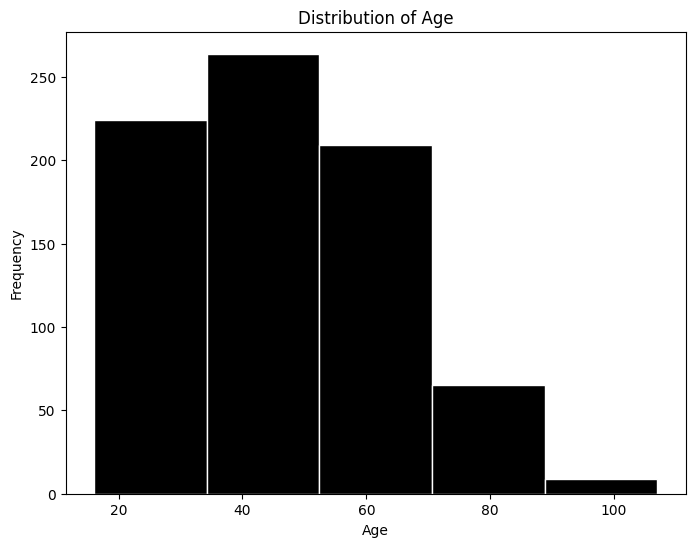

In [48]:
# Visualize: Distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(final_clean_df['Age'], bins=5, color='black', edgecolor='white')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

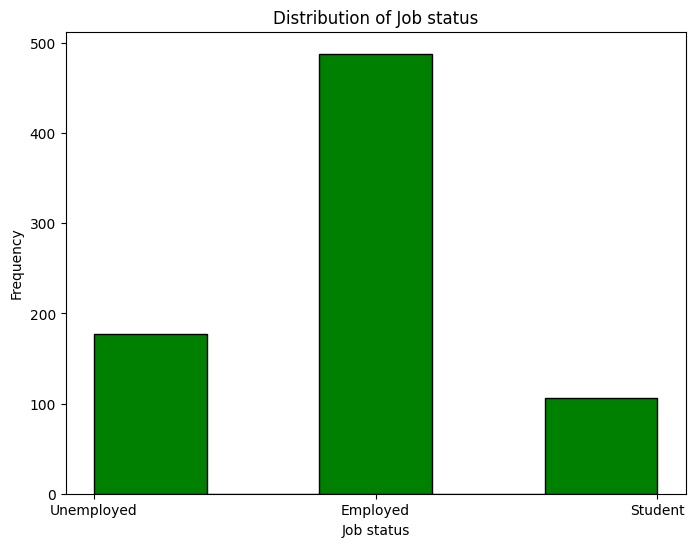

In [49]:
# Visualize: Distribution of Job status

### BEGIN SOLUTION
plt.figure(figsize=(8, 6))
plt.hist(final_clean_df['Job status'], bins=5, color='green', edgecolor='black')
plt.title('Distribution of Job status')
plt.xlabel('Job status')
plt.ylabel('Frequency')
plt.show()
### END SOLUTION

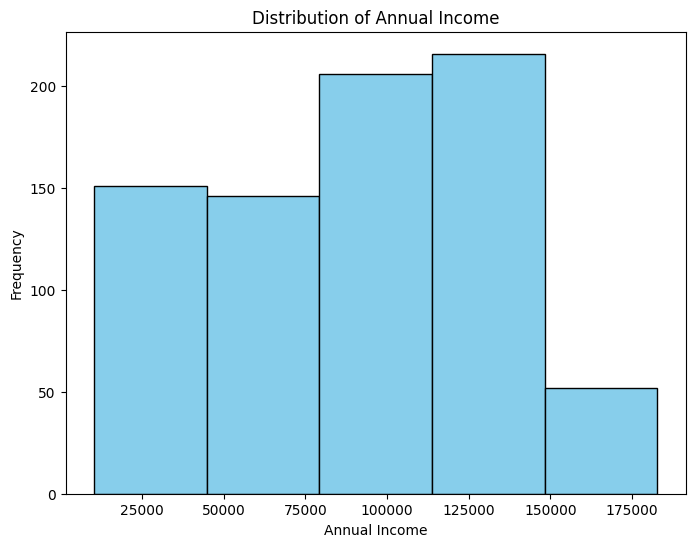

In [50]:
# Visualize: Distribution of Annual Income

### BEGIN SOLUTION
plt.figure(figsize=(8, 6))
plt.hist(final_clean_df['Annual Income'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()
### END SOLUTION

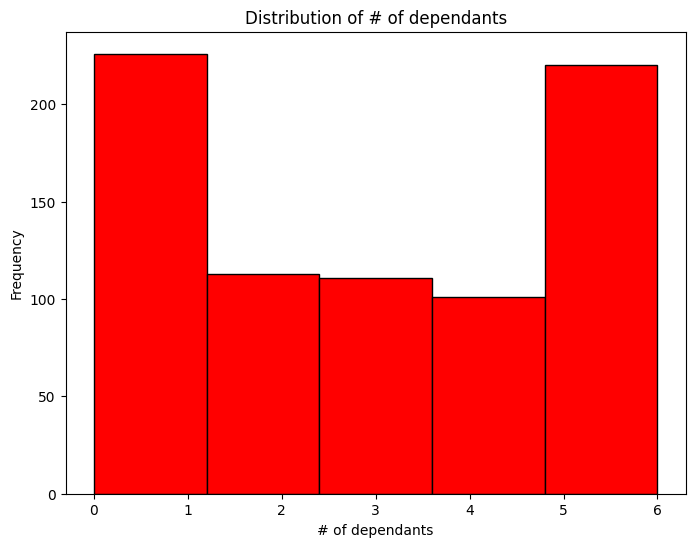

In [51]:
# Visualize: Distribution of Number of Dependants

### BEGIN SOLUTION
plt.figure(figsize=(8, 6))
plt.hist(final_clean_df['# of dependants'], bins=5, color='red', edgecolor='black')
plt.title('Distribution of # of dependants')
plt.xlabel('# of dependants')
plt.ylabel('Frequency')
plt.show()
### END SOLUTION

### A. Analyzing Spending Habits and Their Relationship with Age

We will try to visually deduce how a person's spending habbits varies with age.

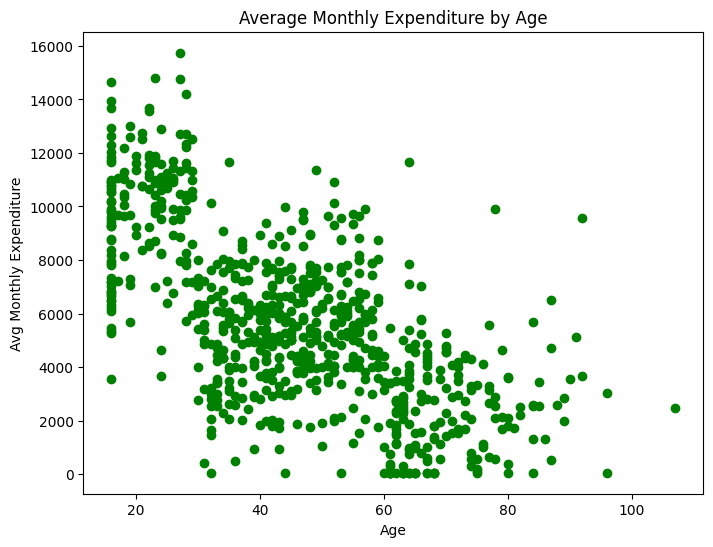

In [52]:
# Visualize: Average Monthly Expenditure by Age
plt.figure(figsize=(8, 6))
plt.scatter(final_clean_df['Age'], final_clean_df['Avg Monthly Expenditure'], color='green')
plt.title('Average Monthly Expenditure by Age')
plt.xlabel('Age')
plt.ylabel('Avg Monthly Expenditure')
plt.show()

### B. Analyzing Spending Habits and Their Relationship with Weekly Income

We will try to visually deduce how a person's spending habbits varies with their income.

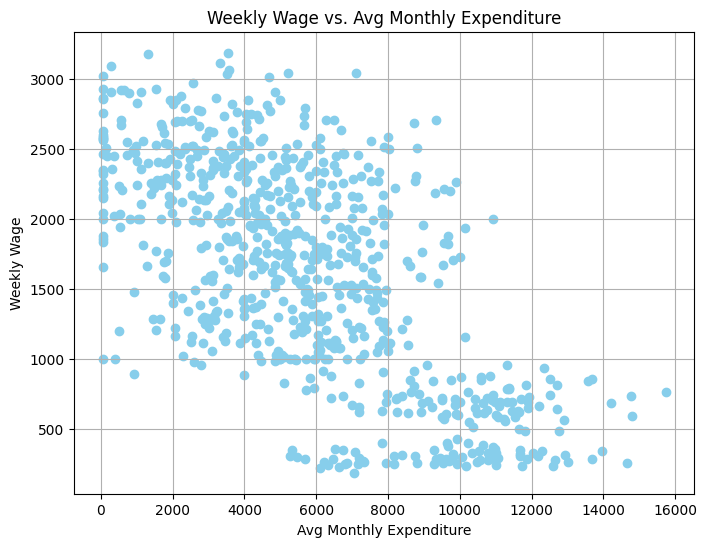

In [53]:
# Visualize: Weekly Wage vs. Avg Monthly Expenditure
### BEGIN SOLUTION
plt.figure(figsize=(8, 6))
plt.scatter(final_clean_df['Avg Monthly Expenditure'], final_clean_df['Weekly wage'], color='skyblue')
plt.title('Weekly Wage vs. Avg Monthly Expenditure')
plt.xlabel('Avg Monthly Expenditure')
plt.ylabel('Weekly Wage')
plt.grid()
plt.show()
### END SOLUTION

In [54]:
# Write short observation based on above plot
observation = ""
### BEGIN SOLUTION
### END SOLUTION

print(observation)

### C. Analyzing Health (BMI) and it's relationship to Income, Age, Employment Status and Marital Status


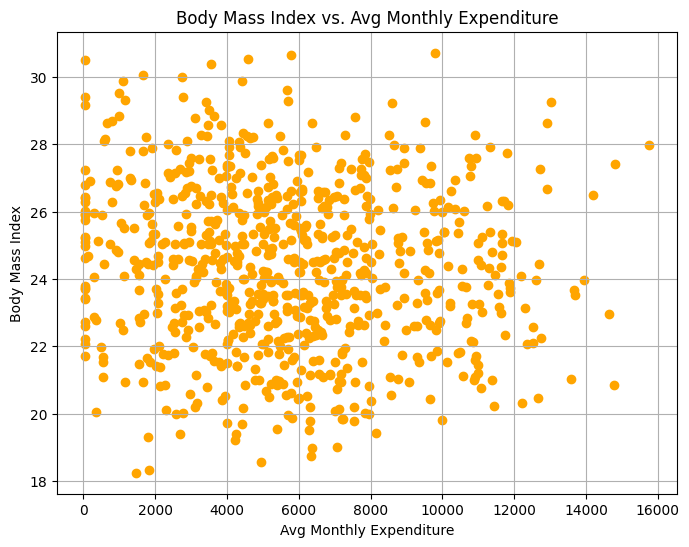

In [55]:
# Visualize: BMI vs Expenditure

plt.figure(figsize=(8, 6))
plt.scatter(final_clean_df['Avg Monthly Expenditure'], final_clean_df['Body Mass Index'], color='orange')
plt.title('Body Mass Index vs. Avg Monthly Expenditure')
plt.xlabel('Avg Monthly Expenditure')
plt.ylabel('Body Mass Index')
plt.grid()
plt.show()


In [56]:
# Write short observation based on above plot
observation = ""
### BEGIN SOLUTION
### END SOLUTION

print(observation)

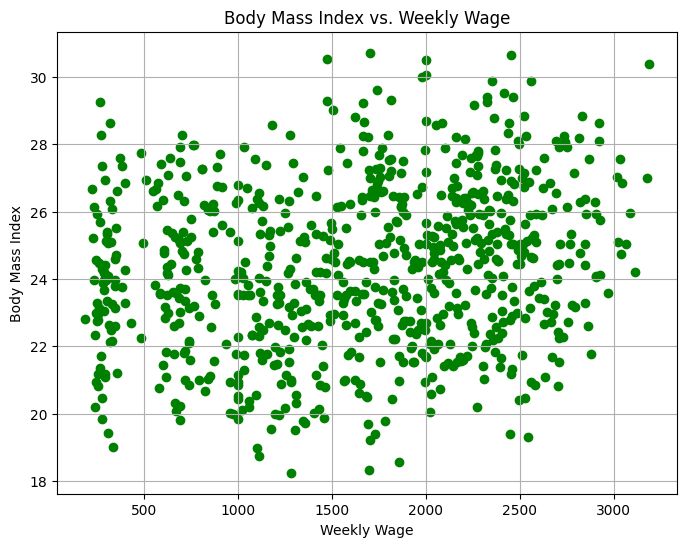

In [57]:
# Visualize: BMI vs Income

### BEGIN SOLUTION
plt.figure(figsize=(8, 6))
plt.scatter(final_clean_df['Weekly wage'], final_clean_df['Body Mass Index'], color='green')
plt.title('Body Mass Index vs. Weekly Wage')
plt.xlabel('Weekly Wage')
plt.ylabel('Body Mass Index')
plt.grid()
plt.show()
### END SOLUTION

In [58]:
# Write short observation based on above plot
observation = ""
### BEGIN SOLUTION
### END SOLUTION

print(observation)

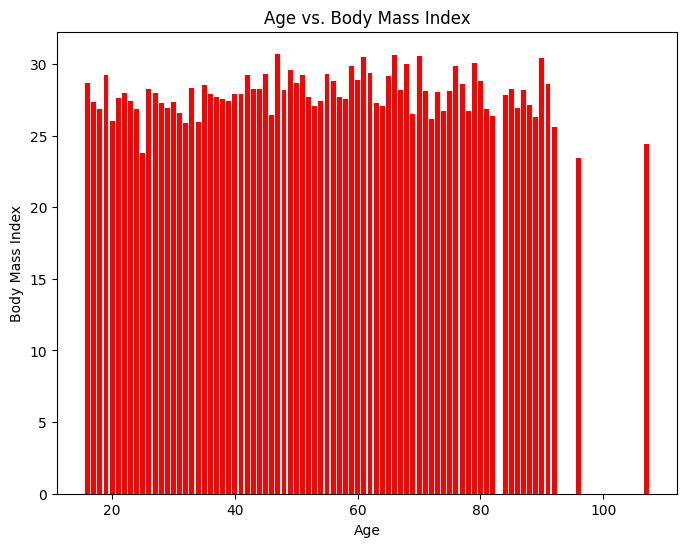

In [59]:
# Visualize: BMI vs Age

plt.figure(figsize=(8, 6))
plt.bar(final_clean_df['Age'], final_clean_df['Body Mass Index'],  color='red')
plt.title('Age vs. Body Mass Index')
plt.xlabel('Age')
plt.ylabel('Body Mass Index')
plt.show()

In [60]:
# Write short observation based on above plot
observation = ""
### BEGIN SOLUTION
### END SOLUTION

print(observation)

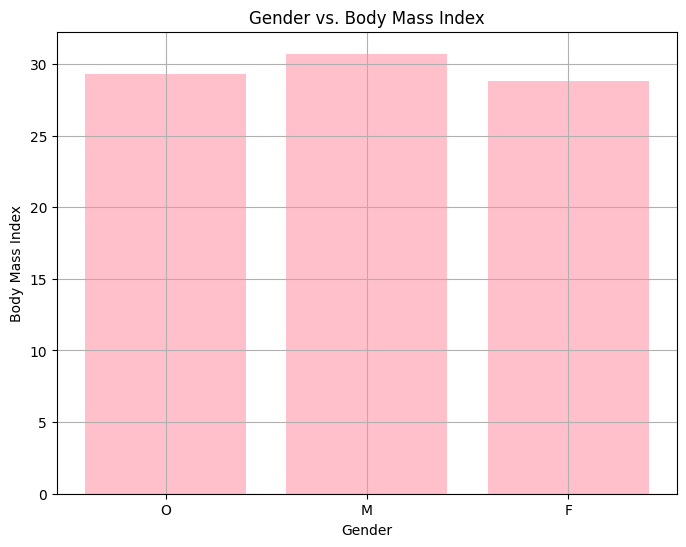

In [61]:
# Visualize: BMI vs Gender

plt.figure(figsize=(8, 6))
plt.bar(final_clean_df['Gender'], final_clean_df['Body Mass Index'],  color='pink')
plt.title('Gender vs. Body Mass Index')
plt.xlabel('Gender')
plt.ylabel('Body Mass Index')

plt.grid()
plt.show()

In [62]:
# Write short observation based on above plot
observation = ""
### BEGIN SOLUTION
### END SOLUTION

print(observation)